# Построение движка для игр на pygame - урок 3

## Повторение

У нас есть основа для создания игр, которая находится в __./first_engine/game.py__<br>
Так же у нас есть основной шаблон для создания игр:

In [2]:
from first_engine.game import Game


class FirstGame(Game):

    def run(self):

        # CODE

        while self.RUNNER:
            self.display_update() # в начале каждой итерации обновляем окно, что бы обновления отобразились
            self.fps_counter() # запускаем счетчик ФПС, можно настраивать
            self.window_fill() # заливаем окно, что бы закрасить следы объектов

            for event in self.events():
                print(event)  # отслеживание событий, не обязательно

                # EVENTS CODE

                self.close(event) # деинициализируем основную библиотеку и выключаем цикл


FirstGame().run()

## Rect & Surface

До сего момента мы создавали объекты при помощи pygame.draw.rect, но у такого способа есть ограничение, мы не можем дифференцировать скин объекта от его тела и места положения. Нам приходится сразу делать все - и создавать, и отрисовывать и перемещать.

Теперь воспользуемся более гибким, но несколько более длинным способом:
- сначало создадим скин
- потом создадим тело от скина
- потом разместим объект в окне
- и в конце поучимся его перемещать

При чем, все эти 4 составляющие будут отделны друг от друга, что даст нам дольшой простор для творчества 

In [3]:
from first_engine.game import Game
import pygame

class FirstGame(Game):

    def run(self):

        obj_skin = pygame.Surface(size=(40, 40)) # Создаем скин объекта c размером 40х40 - это объект Surface
        obj_skin.fill(color=(255, 255, 255)) # Заливаем скин белым
        
        self.parentSurface.blit(source=obj_skin, dest=(10, 10)) # Теперь отрисовываем скин в окне с местоположением 10 на 10

        while self.RUNNER:
            self.display_update()
            self.fps_counter()

            for event in self.events():

                # EVENTS CODE

                self.close(event)


FirstGame().run()

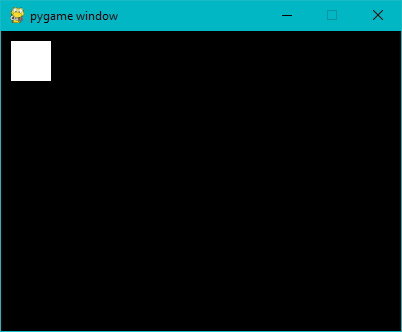

Как Вы можете видель мы отрисовываем скин вне цикла и значит не можем им упровлять, а потому давайте его поместим в цикл

In [ ]:
from first_engine.game import Game
import pygame

class FirstGame(Game):

    def run(self):

        obj_skin = pygame.Surface(size=(40, 40))
        obj_skin.fill(color=(255, 255, 255))

        while self.RUNNER:
            self.display_update()
            self.fps_counter()
                
            self.parentSurface.blit(source=obj_skin, dest=(10, 10))
            
            for event in self.events():

                # EVENTS CODE

                self.close(event)


FirstGame().run()

Теперь мы можем поменять координаты местоположения на переменные и изменять их значения, что бы скин прямоугольника двигался 

Но у нас есть еще один способ, которой мы использовали при старом варианте отрисовывания объектов, но не разбирали его подробно.<br>
Дело в том, что мы можем двигать весь объект, то есть и его скин и его тело изменяя координаты тела, а можем двигать только скин или только тело. Звучит очень странно. Но это именно так как есть, скин и тело, это 2 разные вещи, но взаимосвязанные друг с другом)

Давайте посмотрим на это:

In [5]:
from first_engine.game import Game
import pygame

class FirstGame(Game):

    def run(self):
        
        X, Y = 10, 10 # Добавим координаты для перемещения СКИНА
        
        obj_skin = pygame.Surface(size=(40, 40))
        obj_skin.fill(color=(255, 255, 255))
        
        obj_body = obj_skin.get_rect()  # создадим ТЕЛО, на основе СКИНА, в результате мы получаем объект Rect
                                        # то есть ТЕЛО будет иметь изначальные координаты и размеры СКИНА
        while self.RUNNER:
            self.display_update()
            self.fps_counter()
            self.window_fill()
                
            self.parentSurface.blit(source=obj_skin, dest=(X, Y)) # Вставим координаты для отрисовки СКИНА
            X += 1 # На каждой итерации будем менять положение СКИНА по оси X
            
            print(obj_body.x) # и будем просматривать координаты ТЕЛА по оси X
            
            for event in self.events():

                # EVENTS CODE

                self.close(event)


FirstGame().run()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Как мы можем видеть прямоугольник плывет, но координаты его тела остаются неизменными

Теперь попробуем наоборот

In [6]:
from first_engine.game import Game
import pygame

class FirstGame(Game):

    def run(self):
        
        obj_skin = pygame.Surface(size=(40, 40))
        obj_skin.fill(color=(255, 255, 255))
        
        obj_body = obj_skin.get_rect()  # создадим ТЕЛО, на основе СКИНА, в результате мы получаем объект Rect
                                        # то есть ТЕЛО будет иметь изначальные координаты и размеры СКИНА
        while self.RUNNER:
            self.display_update()
            self.fps_counter()
            self.window_fill()
                
            self.parentSurface.blit(source=obj_skin, dest=(10, 10)) # Вставим координаты для отрисовки СКИНА
            
            obj_body.x += 1 # изменим местоположение ТЕЛА по оси X
            print(obj_body.x) # и будем просматривать координаты ТЕЛА по оси X
            
            for event in self.events():

                # EVENTS CODE

                self.close(event)


FirstGame().run()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


Как видим, на этот раз прямоугольник стоит на месте, но координаты его тела меняются.<br>
Не сразу можно понять зачем это может пригодится, но создание игр - это творческий процесс, и такая возможность может оказаться полезной. Однако нужно быть внимательным.<br>

Теперь свяжем перемещение и тела и скина, так что бы их местоположения совпадали:

In [12]:
from first_engine.game import Game
import pygame

class FirstGame(Game):

    def run(self):
        
        obj_skin = pygame.Surface(size=(40, 40))
        obj_skin.fill(color=(255, 255, 255))
        
        obj_body = obj_skin.get_rect(topleft=(10, 10)) # на этот раз здесь укажем изначальные координаты объекта
        
        while self.RUNNER:
            self.display_update()
            self.fps_counter()
            self.window_fill()
            
            # для этого нам всего лишь необходимо в аргумент dest вставить ТЕЛО объекта от которого был создан скин
            self.parentSurface.blit(source=obj_skin, dest=obj_body)
            # обект Rect по умолчанию возвращает координаты своего верхнего левого угла, 
            # но можно задать и очевидно, дописав obj_body.topleft
            
            obj_body.x += 1
            print(obj_body.x)
            
            for event in self.events():

                # EVENTS CODE

                self.close(event)


FirstGame().run()

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


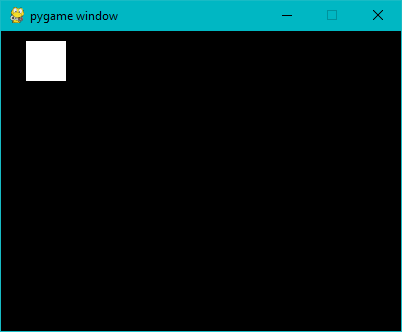

Теперь мы видим что и скин плывет по оси X и координаты его тела меняются

# Дополняем движок новым модулем

В нашей папке __first_engine__ создадим новый модуль __objects.py__ в нем создадм класс __Object__, для создания объектов.

In [13]:
import pygame


class Object:

    def __init__(self, parent: pygame.Surface, # за двоеточием стои пояснение - какой тип объкта должен приниматься
                 width=40, height=40, x=0, y=0, # вставим значения по умолчанию
                 color=(255, 255, 255)):
        
        self.parent = parent

        self.skin = pygame.Surface(size=(width, height))
        self.skin.fill(color=color)

        self.body = self.skin.get_rect(topleft=(x, y))

    def blit(self):
        self.parent.blit(source=self.skin, dest=self.body)

А в главном модуле, где мы проектируем игру, теперь можно создавать и перемещать объекты таким образом

In [15]:
from first_engine.game import Game
from first_engine.objects import Object


class FirstGame(Game):

    def run(self):

        obj = Object(parent=self.parentSurface) # создаем объект в родительском окне, можно менять положение, размеры и цвет

        while self.RUNNER:
            self.fps_counter()
            self.display_update()
            self.window_fill()

            obj.blit() # отрисовываем объект
            obj.body.x += 1 # перемещаем объект

            for event in self.events():

                # EVENTS CODE

                self.close(event)


FirstGame().run()

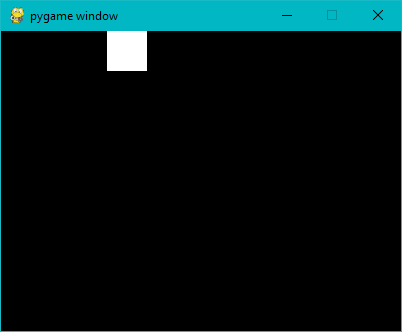

# Задание:
- перепешите рисовалку на обновленном движке
- с какими ограничениями движка при описании рисовалки вы столкнулись?

Давайте исправим эти ограничения немного изменив класс __Object__

In [1]:
import pygame


class Object:

    def __init__(self, parent: pygame.Surface,
                 width=40, height=40, x=0, y=0,
                 color=(255, 255, 255)):
        self.parent = parent
        self.color = color # выделим для цвета отдельную переменную

        self.skin = pygame.Surface(size=(width, height))
        self.body = self.skin.get_rect(topleft=(x, y))

    def blit(self):
        self.skin.fill(color=self.color) # заливать объект теперь будем вначале данного метода при каждом его вызове
        self.parent.blit(source=self.skin, dest=self.body)

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
